# Part 3 - Predictive Modeling

### Loading and Inspecting DataFrame

In [1]:
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

with open('ultimate_data_challenge.json') as f:
    data = json.load(f)

df = json_normalize(data)
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [3]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


### Data Cleaning
#### Missing Values

**Phone**: Because the missing rows make up a very small percentage of the dataset (less than 1%), I decided to drop these rows first.  Hopefully they remove some of the other missing values as well with them.

In [4]:
x=df.phone.isnull().sum()
print('Missing phone values: {}'.format(x))
print('Percentage: {}%'.format(x/len(df)*100))

Missing phone values: 396
Percentage: 0.792%


In [5]:
df = df.dropna(subset=['phone'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  49604 non-null float64
avg_rating_by_driver      49406 non-null float64
avg_rating_of_driver      41578 non-null float64
avg_surge                 49604 non-null float64
city                      49604 non-null object
last_trip_date            49604 non-null object
phone                     49604 non-null object
signup_date               49604 non-null object
surge_pct                 49604 non-null float64
trips_in_first_30_days    49604 non-null int64
ultimate_black_user       49604 non-null bool
weekday_pct               49604 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


**Average Rating By/Of the Driver**: Because the distribution of average ratings by the driver and of the driver are both strongly skewed to the left (as seen in the figures below), I am replacing the missing values with the median of the individual ratings.

C:\Users\Schmalz\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distribution of Avg Ratings by Driver')

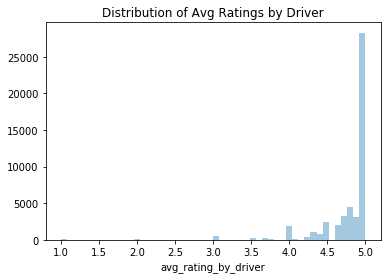

In [6]:
sns.distplot(df.avg_rating_by_driver.dropna(), kde=False)
plt.title('Distribution of Avg Ratings by Driver')

Text(0.5,1,'Distribution of Avg Ratings of Driver')

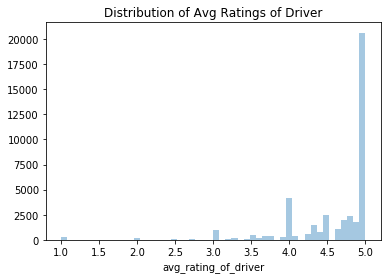

In [7]:
sns.distplot(df.avg_rating_of_driver.dropna(), kde=False)
plt.title('Distribution of Avg Ratings of Driver')

In [8]:
by_driver_med = df.avg_rating_by_driver.median()
of_driver_med = df.avg_rating_of_driver.median()
df = df.fillna({'avg_rating_by_driver': by_driver_med,
                'avg_rating_of_driver': of_driver_med})

#### Unusual Value

In [9]:
df.sort_values(by=['avg_dist'], ascending=False).head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
20701,160.96,5.0,4.9,1.0,Astapor,2014-06-26,Android,2014-01-25,0.0,0,False,100.0
1302,79.69,5.0,5.0,1.0,Winterfell,2014-01-30,iPhone,2014-01-30,0.0,1,False,100.0
22290,79.34,5.0,5.0,1.0,Astapor,2014-06-26,iPhone,2014-01-12,0.0,0,True,100.0
47595,77.13,5.0,5.0,1.0,King's Landing,2014-06-09,iPhone,2014-01-25,0.0,0,True,0.0
36625,73.88,3.0,5.0,1.0,Astapor,2014-01-22,iPhone,2014-01-19,0.0,2,False,100.0


What to do with this driver that has an average distance of 161 miles?  It's almost double the next highest and makes me think it has to be an error.  Ask Aiden if he would drop it or leave it in.

#### Convert data types

In [10]:
df = df.astype({'city':'category', 'phone':'category'})
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['ultimate_black_user'] = df['ultimate_black_user'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  49604 non-null float64
avg_rating_by_driver      49604 non-null float64
avg_rating_of_driver      49604 non-null float64
avg_surge                 49604 non-null float64
city                      49604 non-null category
last_trip_date            49604 non-null datetime64[ns]
phone                     49604 non-null category
signup_date               49604 non-null datetime64[ns]
surge_pct                 49604 non-null float64
trips_in_first_30_days    49604 non-null int64
ultimate_black_user       49604 non-null int32
weekday_pct               49604 non-null float64
dtypes: category(2), datetime64[ns](2), float64(6), int32(1), int64(1)
memory usage: 4.1 MB


### Create label to describe retention

In [11]:
#Assuming pull date of data corresponds to the date of the most recent trip given
pull_date = df.last_trip_date.max()
print(pull_date)

2014-07-01 00:00:00


In [12]:
#Create function to apply to the dataframe.  Creates a column of 0/1 if the driver was retained
def determine(row):
    recent = row.last_trip_date
    if (pull_date - recent).days <= 30:
        return 1
    else:
        return 0

df['retained'] = df.apply(determine, axis=1)

In [13]:
print('Percentage of retained drivers: {}%'.format(round(df.retained.mean()*100,2)))

Percentage of retained drivers: 37.64%


### Exploratory Data Analysis

I looked at hypothesis tests for the difference in means for each column split on whether the user was retained or not.  At first glance, it appears there are a lot of differences statistically between the two groups; most notably, the average distance driven, and if they took an ultimate black user in the first 30 days.

In [49]:
retained = df.loc[df.retained==1, :]
not_retained = df.loc[df.retained==0,:]

In [50]:
from scipy.stats import ttest_ind
from pandas.api.types import is_numeric_dtype

for col in df.columns:
    if is_numeric_dtype(df[col]):
        t, p = ttest_ind(a=retained[col], b=not_retained[col], equal_var=False)
        print('Feature: {}\tStatistic: {}\tP-value: {}'.format(col, t, p))

Feature: avg_dist	Statistic: -22.079706068303118	P-value: 1.727820417333252e-107
Feature: avg_rating_by_driver	Statistic: -6.675622461777521	P-value: 2.4878593181869446e-11
Feature: avg_rating_of_driver	Statistic: -9.352993571609533	P-value: 8.911235346478457e-21
Feature: avg_surge	Statistic: -0.994981416147127	P-value: 0.31975017877699063
Feature: surge_pct	Statistic: 2.7338251168261585	P-value: 0.006262599023690767
Feature: trips_in_first_30_days	Statistic: 41.73250591826147	P-value: 0.0
Feature: ultimate_black_user	Statistic: 46.009157241602985	P-value: 0.0
Feature: weekday_pct	Statistic: 2.32355466949379	P-value: 0.02015352086487734
Feature: retained	Statistic: inf	P-value: 0.0


### Predictive Modeling

#### Model Selection and Training
I started with the random forest classifier, as this type of model typically performs pretty well "out of the box", so to speak.  I also tried several other standard classifiers such as logistic regression, multinomial naive bayes, and k-nearest neighbors, but the random forest classifier consistently had higher accuracy.  After deciding on my type of classifier, I used the grid search cross-validation function from scikit-learn to tune hyperparameters.  This is especially important for random forests, as they have a tendency to overfit if left to the default parameters.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#Separate dataframe into features and target variables
X = df.drop('retained', axis=1)
y = df.retained

#Remove datetime objects to prep for machine learning
X = X.drop(['last_trip_date', 'signup_date'], axis=1)

#Create dummy variables for categorical type columns
X = pd.get_dummies(X)

#Splitting data into train and test before scaling
X_train, X_test, y_train, y_test = train_test_split(X, y)

#Scaling features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\Schmalz\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [16]:
#RandomForest Classifier gridsearch and fitting

params = {'n_estimators':[10, 25, 50], 'min_samples_split':[2, 5, 8, 11],
          'max_features':['sqrt', 'log2']}

clf_rf = RandomForestClassifier()
grid_rf = GridSearchCV(clf_rf, params, cv=3)
grid_rf.fit(X_train_scaled, y_train)
print(grid_rf.best_score_)
print(grid_rf.best_estimator_)

0.7761739644652313
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=11,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


#### Model Evaluation

**Key Metrics:**

Accuracy - 77.6%

Precision - 72.1%

Recall - 65.7%

True Negative Rate - 84.8%

Area under the Curve - 0.7526

The model appears to be doing a moderate job at predicting retention of a user after six months.  The true negative rate of 84.8% shows that it at its most accurate when predicting non-retention for a user who will not be there still.  However, it struggles with recall, which describes the proportion of retentions that were classified.

In [33]:
#Confusion matrix
y_pred = grid_rf.best_estimator_.predict(X_test_scaled)

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n{}'.format(confusion_matrix(y_test, y_pred)))

from sklearn.metrics import roc_auc_score
print('AUC score: {}'.format(roc_auc_score(y_test, y_pred)))

Confusion Matrix:
[[6572 1181]
 [1592 3056]]
AUC score: 0.7525794800879921


### Ultimate Leverage

In the figure below, we can see the importance of specific features that impacted the likelihood of retaining a user or not.  As we can see, factors such as the city or phone used had little to no impact on the likelihood of their retention.  However, the average distance that they drove, as well as the rating by the driver had the largest impact on retention.  If Ultimate would like to increase retention of driver, it would seem that providing drivers with loner drives and more quality passengers would result in that.

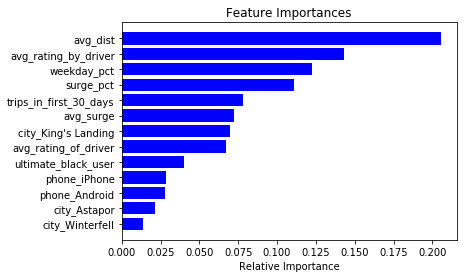

In [38]:
import numpy as np
features = X.columns
importances = grid_rf.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()